# Problem Statement: Use of Logistic regression for multiple classification


# Dataset Description:
##  2.Multiclass dataset : 
###     Digits:
        This dataset contains grayscale images of handwritten digits, ranging from 0 to 9, and is widely used as a benchmark dataset in the field of machine learning.
        The dataset comprises a total of 1797 samples, with each sample containing an 8x8 image of a digit and its corresponding label. The images are represented as flattened arrays of length 64, with each element of the array representing the grayscale intensity value of a pixel in the image. The labels of the dataset are integers ranging from 0 to 9, representing the true value of the digit in the corresponding image.


###    Class to classify: Left 


In [1]:
#import dataset from sklearn
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits=load_digits()



<Figure size 640x480 with 0 Axes>

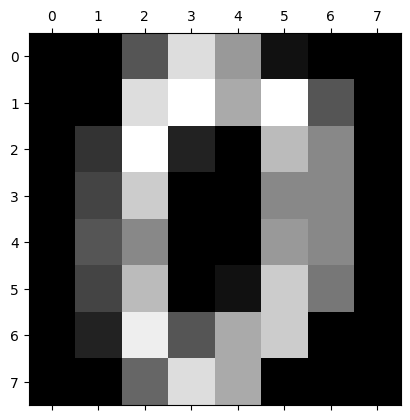

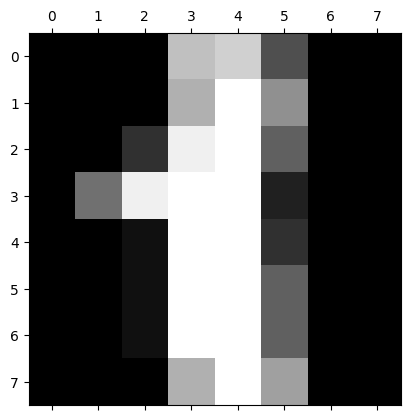

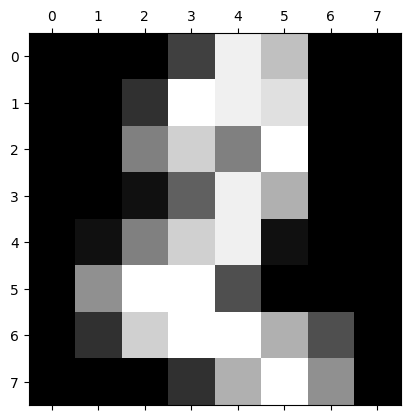

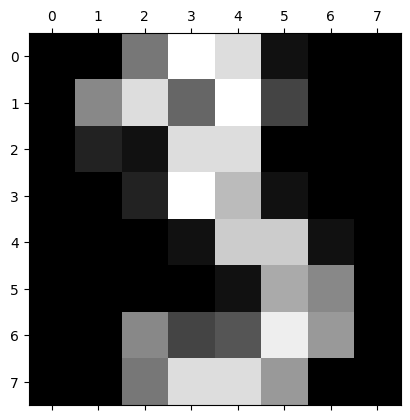

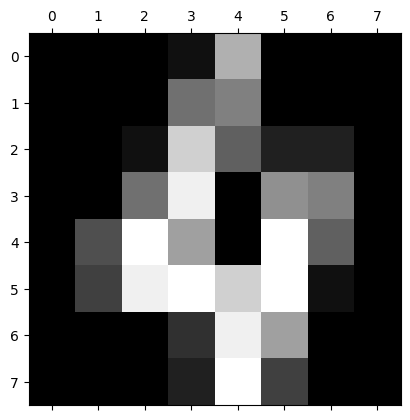

In [2]:
#set colour map to gray
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])


In [41]:
from sklearn.linear_model import LogisticRegression
#create multiclass compatible model with lbfgs solver
model = LogisticRegression(multi_class='auto',solver='lbfgs')

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score


In [43]:
#Finding the cross validation score
cs_score= cross_val_score(model,digits.data,digits.target,cv=5)


/Users/rohinjoshi/Coding/codes/sem_6/ML/LogisticRegression/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rohinjoshi/Coding/codes/sem_6/ML/LogisticRegression/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

In [44]:
cs_score.mean()

0.9137650882079852

In [45]:
#Split data into training data and test data based on 80:20 principle
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,train_size=0.8)


In [46]:
model.fit(x_train,y_train)


/Users/rohinjoshi/Coding/codes/sem_6/ML/LogisticRegression/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
#Find the score of the model based on accuracy

model.score(x_test,y_test)


0.9694444444444444

In [48]:
#prediction first 5 digits
model.predict(digits.data[0:5])
#store predicted value of x_test in y_predict
y_predict = model.predict(x_test)

#CONFUSION MATRIX

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)

cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 27,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 39]])

<Axes: >

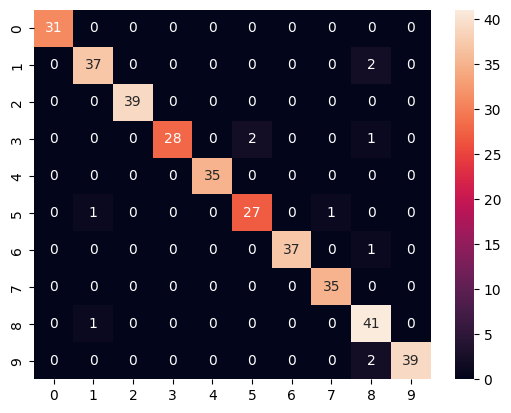

In [50]:
import seaborn as sb

sb.heatmap(cm,annot=True)


In [57]:
from sklearn import metrics



SCORES

In [51]:
#Find all scoring metrics
print("Accuracy ",accuracy_score(y_test,y_predict))
print("Precision",precision_score(y_test,y_predict,average='micro'))
print("Recall:",recall_score(y_test,y_predict,average='micro'))
print("F1 score",f1_score(y_test,y_predict,average='micro'))



Accuracy  0.9694444444444444
Precision 0.9694444444444444
Recall: 0.9694444444444444
F1 score 0.9694444444444444


In [54]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print("Mean Squared Error: ", mse)
print("R2 score: ", r2)

Mean Squared Error:  0.5722222222222222
R2 score:  0.933034202582373


## Performance Review
Logistic regression performed well for the above dataset as the classes were well separated and linearly separable
Additionally the number of features are small relative to the number of samples, and there is low noise in the data.

# When will you use LR for multiclassification:
    1.The classes are well-separated and the decision boundary is expected to be linear.
    2.There are relatively few features compared to the number of samples, and the data is not too noisy.
    3.There is a need for a probabilistic interpretation of the output.

# When will you not use LR for multiclassification:
    1.The classes are not well-separated, or the decision boundary is expected to be nonlinear.
    2.There are many features relative to the number of samples, and the data is noisy.
    3.The relationships between the features and the outcome are complex and cannot be captured by a linear model.
    4.The goal is to achieve the highest possible accuracy, as logistic regression may not always be the most accurate algorithm for multiclassification problems.
In cases where logistic regression is not appropriate, other algorithms such as decision trees, random forests, or support vector machines (SVMs) may be more suitable for multiclassification problems.